# Day 9 - Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Secondary Axis

### Spectrum Visualization

Text(0.5, 1.0, 'Random spectrum')

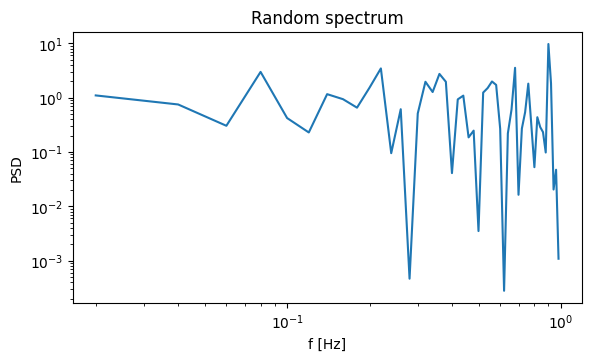

In [2]:
np.random.seed(19680801)

fig, ax = plt.subplots(figsize=(5.8, 3.5), constrained_layout=True)

x = np.arange(0.02, 1, 0.02)
y = np.random.randn(len(x))**2

ax.loglog(x, y) # for applying log scale in both x and y axis

ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')

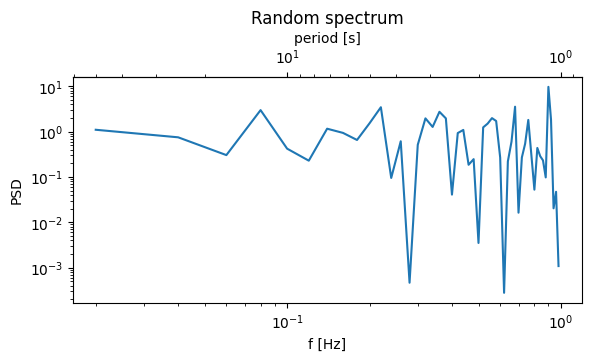

In [3]:
np.random.seed(19680801)

fig, ax = plt.subplots(figsize=(5.8, 3.5), constrained_layout=True)

x = np.arange(0.02, 1, 0.02)
y = np.random.randn(len(x))**2

ax.loglog(x, y) # for applying log scale in both x and y axis

ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')

def transform(x):
    # Vectorizing 1/x, we also treat x == 0 manually
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1/x[~near_zero]
    # we return a new array x
    return x

inverse = transform

sec_axis = ax.secondary_xaxis('top', functions=(transform, inverse))
sec_axis.set_xlabel('period [s]')

plt.show()

### Secondary axis Exercise

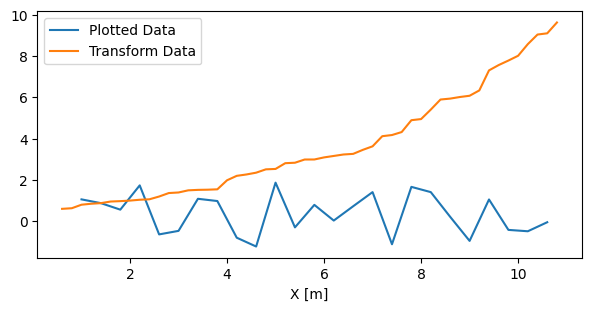

In [4]:
np.random.seed(19680801)
fig, ax = plt.subplots(figsize=(5.8, 3), constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))

ax.plot(xdata, ydata, label='Plotted Data')

xold = np.arange(0, 11, 0.2)
xnew = np.sort(10 * np.exp(-xold/4) + np.random.randn(len(xold)) / 3)

ax.plot(xold[3:], xnew[3:], label='Transform Data')
ax.set_xlabel('X [m]')

ax.legend()

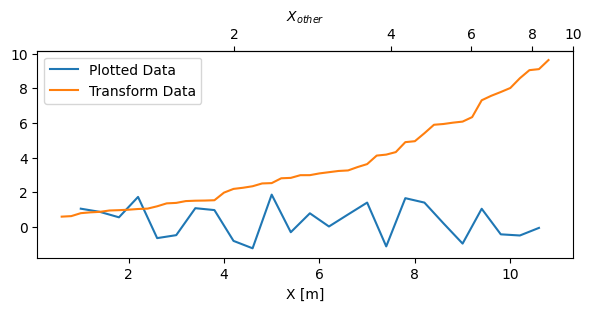

In [5]:
np.random.seed(19680801)
fig, ax = plt.subplots(figsize=(5.8, 3), constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))

ax.plot(xdata, ydata, label='Plotted Data')

xold = np.arange(0, 11, 0.2)
xnew = np.sort(10 * np.exp(-xold/4) + np.random.randn(len(xold)) / 3)

ax.plot(xold[3:], xnew[3:], label='Transform Data')
ax.set_xlabel('X [m]')

ax.legend()

def transform(x):
    return np.interp(x, xold, xnew)

def inverse(x):
    return np.interp(x, xnew, xold)

sec_axis = ax.secondary_xaxis('top', functions=(transform, inverse))
sec_axis.set_xlabel('$X_{other}$')

plt.show()

## Congratulate, Day 9 Finished!